In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

class SP500DataFetcher:
    """Class to fetch data for S&P 500 stocks"""
    def __init__(self, start_date="2024-07-01", end_date="2024-12-31"):
        self.start_date = start_date
        self.end_date = end_date
        self.sp500_tickers = [
            "MMM", "AOS", "ABT", "ABBV", "ACN", "ADBE", "AMD", "AES", "AFL", "A",
            "APD", "ABNB", "AKAM", "ALB", "ARE", "ALGN", "ALLE", "LNT", "ALL", "GOOGL",
            "GOOG", "MO", "AMZN", "AMCR", "AEE", "AEP", "AXP", "AIG", "AMT", "AWK",
            "AMP", "AME", "AMGN", "APH", "ADI", "ANSS", "AON", "APA", "APO", "AAPL",
            "AMAT", "APTV", "ACGL", "ADM", "ANET", "AJG", "AIZ", "T", "ATO", "ADSK",
            "ADP", "AZO", "AVB", "AVY", "AXON", "BKR", "BALL", "BAC", "BAX", "BDX",
            "BRK-B", "BBY", "TECH", "BIIB", "BLK", "BX", "BK", "BA", "BKNG", "BSX",
            "BMY", "AVGO", "BR", "BRO", "BF-B", "BLDR", "BG", "BXP", "CHRW", "CDNS",
            "CZR", "CPT", "CPB", "COF", "CAH", "KMX", "CCL", "CARR", "CAT", "CBOE",
            "CBRE", "CDW", "COR", "CNC", "CNP", "CF", "CRL", "SCHW", "CHTR", "CVX",
            "CMG", "CB", "CHD", "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CLX",
            "CME", "CMS", "KO", "CTSH", "CL", "CMCSA", "CAG", "COP", "ED", "STZ",
            "CEG", "COO", "CPRT", "GLW", "CPAY", "CTVA", "CSGP", "COST", "CTRA", "CRWD",
            "CCI", "CSX", "CMI", "CVS", "DHR", "DRI", "DVA", "DAY", "DECK", "DE", "DELL",
            "DAL", "DVN", "DXCM", "FANG", "DLR", "DFS", "DG", "DLTR", "D", "DPZ",
            "DASH", "DOV", "DOW", "DHI", "DTE", "DUK", "DD", "EMN", "ETN", "EBAY",
            "ECL", "EIX", "EW", "EA", "ELV", "EMR", "ENPH", "ETR", "EOG", "EPAM",
            "EQT", "EFX", "EQIX", "EQR", "ERIE", "ESS", "EL", "EG", "EVRG", "ES",
            "EXC", "EXE", "EXPE", "EXPD", "EXR", "XOM", "FFIV", "FDS", "FICO", "FAST",
            "FRT", "FDX", "FIS", "FITB", "FSLR", "FE", "FI", "F", "FTNT", "FTV", "FOXA",
             "BEN", "FCX", "GRMN", "IT", "GE", "GEHC", "GEV", "GEN", "GNRC",
            "GD", "GIS", "GM", "GPC", "GILD", "GPN", "GL", "GDDY", "GS", "HAL", "HIG",
            "HAS", "HCA", "DOC", "HSIC", "HSY", "HES", "HPE", "HLT", "HOLX", "HD", "HON",
            "HRL", "HST", "HWM", "HPQ", "HUBB", "HUM", "HBAN", "HII", "IBM", "IEX", "IDXX",
            "ITW", "INCY", "IR", "PODD", "INTC", "ICE", "IFF", "IP", "IPG", "INTU",
            "ISRG", "IVZ", "INVH", "IQV", "IRM", "JBHT", "JBL", "JKHY", "J", "JNJ",
            "JCI", "JPM", "JNPR", "K", "KVUE", "KDP", "KEY", "KEYS", "KMB", "KIM", "KMI",
            "KKR", "KLAC", "KHC", "KR", "LHX", "LH", "LRCX", "LW", "LVS", "LDOS", "LEN",
            "LII", "LLY", "LIN", "LYV", "LKQ", "LMT", "L", "LOW", "LULU", "LYB", "MTB",
            "MPC", "MKTX", "MAR", "MMC", "MLM", "MAS", "MA", "MTCH", "MKC", "MCD", "MCK",
            "MDT", "MRK", "META", "MET", "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA",
            "MRNA", "MHK", "MOH", "TAP", "MDLZ", "MPWR", "MNST", "MCO", "MS", "MOS", "MSI",
            "MSCI", "NDAQ", "NTAP", "NFLX", "NEM", "NWSA", "NWS", "NEE", "NKE", "NI",
            "NDSN", "NSC", "NTRS", "NOC", "NCLH", "NRG", "NUE", "NVDA", "NVR", "NXPI",
            "ORLY", "OXY", "ODFL", "OMC", "ON", "OKE", "ORCL", "OTIS", "PCAR", "PKG",
            "PLTR", "PANW", "PARA", "PH", "PAYX", "PAYC", "PYPL", "PNR", "PEP", "PFE",
            "PCG", "PM", "PSX", "PNW", "PNC", "POOL", "PPG", "PPL", "PFG", "PG", "PGR",
            "PLD", "PRU", "PEG", "PTC", "PSA", "PHM", "PWR", "QCOM", "DGX", "RL", "RJF",
            "RTX", "O", "REG", "REGN", "RF", "RSG", "RMD", "RVTY", "ROK", "ROL", "ROP",
            "ROST", "RCL", "SPGI", "CRM", "SBAC", "SLB", "STX", "SRE", "NOW", "SHW",
            "SPG", "SWKS", "SJM", "SW", "SNA", "SOLV", "SO", "LUV", "SWK", "SBUX",
            "STT", "STLD", "STE", "SYK", "SMCI", "SYF", "SNPS", "SYY", "TMUS", "TROW",
            "TTWO", "TPR", "TRGP", "TGT", "TEL", "TDY", "TER", "TSLA", "TXN", "TPL", "TXT",
            "TMO", "TJX", "TKO", "TSCO", "TT", "TDG", "TRV", "TRMB", "TFC", "TYL", "TSN",
            "USB", "UBER", "UDR", "ULTA", "UNP", "UAL", "UPS", "URI", "UNH", "UHS", "VLO",
            "VTR", "VLTO", "VRSN", "VRSK", "VZ", "VRTX", "VTRS", "VICI", "V", "VST", "VMC",
            "WRB", "GWW", "WAB", "WBA", "WMT", "DIS", "WBD", "WM", "WAT", "WEC", "WFC",
            "WELL", "WST", "WDC", "WY", "WSM", "WMB", "WTW", "WDAY", "WYNN", "XEL", "XYL",
            "YUM", "ZBRA", "ZBH", "ZTS"
        ]

    def fetch_stock_data(self, ticker):
        """Fetch historical data for a given ticker"""
        try:
            stock = yf.Ticker(ticker)
            data = stock.history(start=self.start_date, end=self.end_date)
            return data['Close']
        except Exception as e:
            print(f"Error for {ticker}: {e}")
            return None

class FinancialMetricsCalculator:
    """Class to calculate financial metrics"""
    def __init__(self, risk_free_rate=0.0421):
        self.risk_free_rate = risk_free_rate
        self.trading_days_per_year = 252

    def calculate_total_return(self, prices):
        """Calculate total return over the period"""
        if prices is None or len(prices) < 2:
            return None
        return ((prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0])

    def calculate_annualized_return(self, prices):
        """Calculate annualized return over the period"""
        total_return = self.calculate_total_return(prices)
        if total_return is None:
            return None
        num_days = len(prices) - 1  # Number of trading days in the period
        if num_days <= 0:
            return None
        annualized_return = (1+total_return) ** (self.trading_days_per_year / num_days) - 1
        return annualized_return

    def calculate_volatility(self, prices):
        """Calculate annualized volatility of daily returns"""
        if prices is None or len(prices) < 2:
            return None
        daily_returns = prices.pct_change().dropna()
        return daily_returns.std() * np.sqrt(self.trading_days_per_year)

    def calculate_sharpe_ratio(self, annualized_return, volatility):
        """Calculate Sharpe Ratio with annualized metrics"""
        if annualized_return is None or volatility is None or volatility == 0:
            return None
        excess_return = annualized_return - self.risk_free_rate
        return excess_return / volatility

class SP500Analyzer:
    """Main class to analyze S&P 500 stocks"""
    def __init__(self):
        self.data_fetcher = SP500DataFetcher()
        self.metrics_calculator = FinancialMetricsCalculator()
        self.results = {}

    def analyze_all_stocks(self):
        """Analyze all S&P 500 stocks"""
        for ticker in self.data_fetcher.sp500_tickers:
            prices = self.data_fetcher.fetch_stock_data(ticker)

            if prices is not None:
                total_return = self.metrics_calculator.calculate_total_return(prices)
                annualized_return = self.metrics_calculator.calculate_annualized_return(prices)
                volatility = self.metrics_calculator.calculate_volatility(prices)
                sharpe_ratio = self.metrics_calculator.calculate_sharpe_ratio(
                    annualized_return, volatility)

                self.results[ticker] = {
                    'total_return': total_return,
                    'annualized_return': annualized_return,
                    'volatility': volatility,
                    'sharpe_ratio': sharpe_ratio
                }

    def get_results_df(self):
        """Return results as a DataFrame"""
        return pd.DataFrame(self.results).T

    def get_top_20(self):
        """Return a DataFrame with the top 20 stocks based on absolute Sharpe Ratio"""
        df = self.get_results_df()

        # Replace NaN with 0 to avoid issues
        df = df.fillna(0)

        # Calculate absolute Sharpe Ratio
        df['abs_sharpe_ratio'] = df['sharpe_ratio'].abs()

        # Sort by absolute Sharpe Ratio and take top 20
        top_20 = df.sort_values(by='abs_sharpe_ratio', ascending=False).head(20)

        # Return relevant columns
        return top_20[['total_return', 'annualized_return', 'volatility', 'abs_sharpe_ratio']]

def main():
    # Initialize analysis
    analyzer = SP500Analyzer()

    # Start analysis
    print("Starting analysis of S&P 500 stocks (July 1 - December 31, 2024)...")
    analyzer.analyze_all_stocks()

    # Get and display top 20 stocks
    top_20_df = analyzer.get_top_20()
    print("\nTop 20 stocks based on absolute annualized Sharpe Ratio:")
    print(top_20_df)

    # Save full results and top 20 to CSV files
    results_df = analyzer.get_results_df()
    results_df.to_csv('sp500_metrics_jul_dec_2024.csv')
    top_20_df.to_csv('sp500_top_20_jul_dec_2024.csv')
    print("\nFull results saved to 'sp500_metrics_jul_dec_2024.csv'")
    print("Top 20 saved to 'sp500_top_20_jul_dec_2024.csv'")

if __name__ == "__main__":
    main()

Starting analysis of S&P 500 stocks (July 1 - December 31, 2024)...

Top 20 stocks based on absolute annualized Sharpe Ratio:
      total_return  annualized_return  volatility  abs_sharpe_ratio
PLTR      1.982226           7.893671    0.622694         12.609028
UAL       1.032071           3.129313    0.452414          6.823864
GEV       0.972948           2.892524    0.467186          6.101264
AXON      1.089554           3.366238    0.561875          5.916146
FOXA      0.440900           1.076194    0.212863          4.858021
FI        0.401862           0.965218    0.197021          4.685389
KMI       0.417530           1.009390    0.212926          4.542850
DASH      0.562990           1.442937    0.314301          4.456997
CBRE      0.515296           1.296122    0.285123          4.398172
NI        0.299425           0.688504    0.148419          4.355256
WMT       0.348983           0.819756    0.187232          4.153434
TSLA      0.988993           2.956092    0.719475         

[*****                 10%                       ]  2 of 20 completed

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  20 of 20 completed


Downloaded tickers: ['AXON', 'BLK', 'CBRE', 'DASH', 'ETR', 'EXPE', 'FFIV', 'FI', 'FOXA', 'GEV', 'GILD', 'K', 'KMI', 'LYV', 'NI', 'PLTR', 'TPR', 'TSLA', 'UAL', 'WMT']


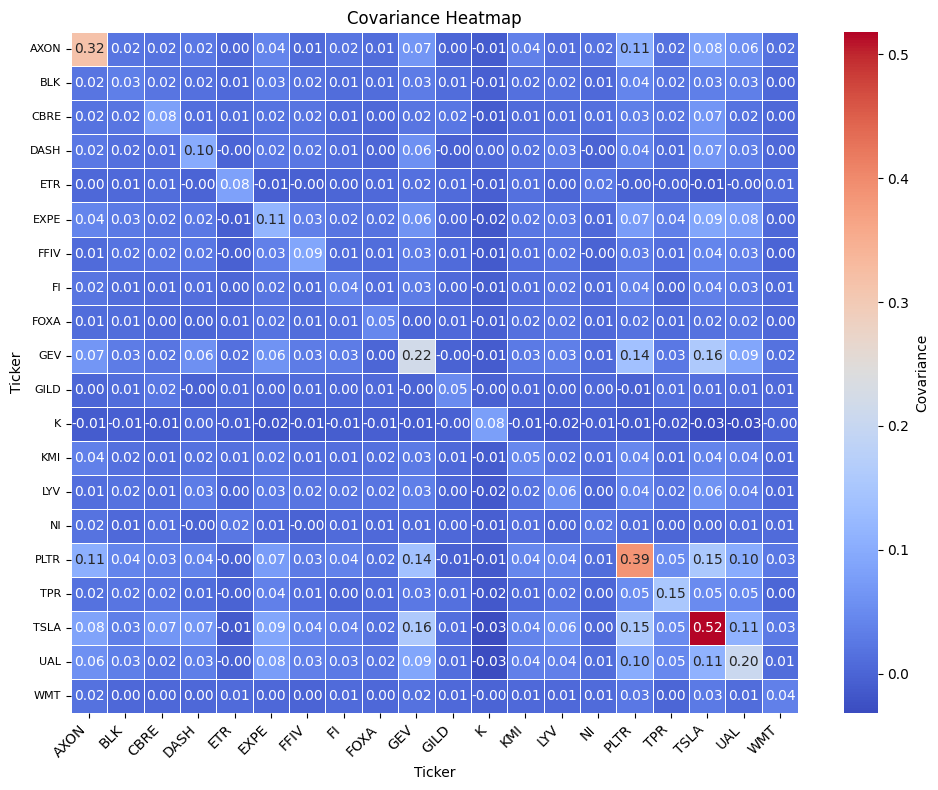

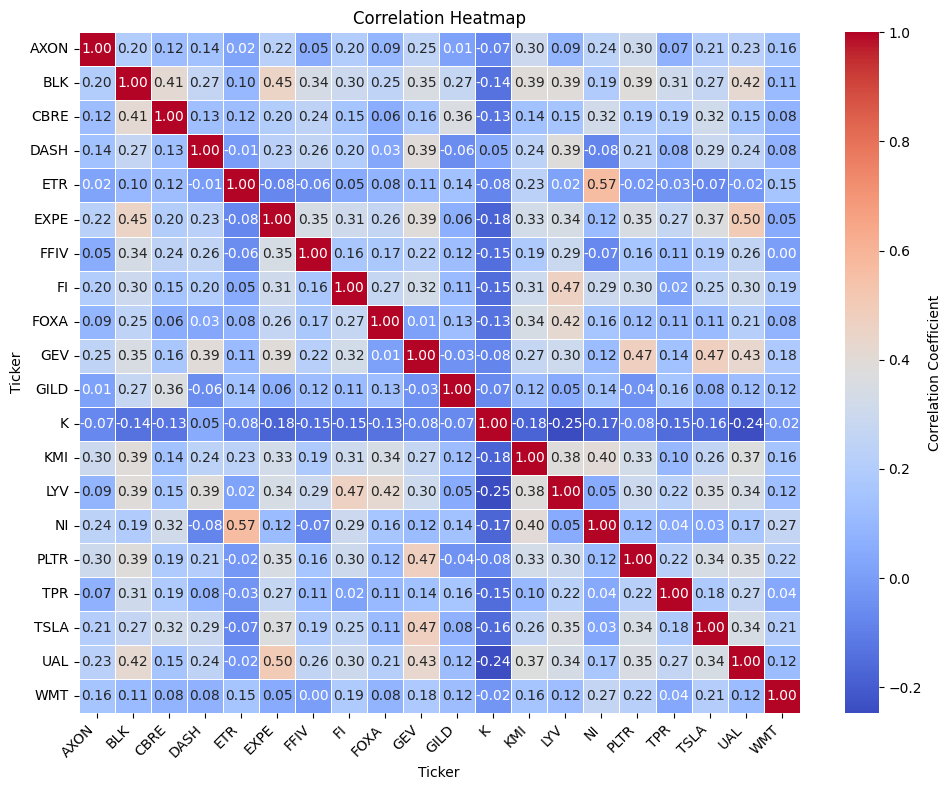


Overall Portfolio Correlation: 0.1668


In [ ]:
import seaborn as sns
import cvxpy as cp
import matplotlib.pyplot as plt


tickers_by_sharpeLS = [
    "PLTR",
    "UAL",
    "GEV",
    "AXON",
    "FOXA",
    "FI",
    "KMI",
    "DASH",
    "CBRE",
    "NI",
    "WMT",
    "TSLA",
    "BLK",
    "ETR",
    "TPR",
    "FFIV",
    "EXPE",
    "K",
    "LYV",
    "GILD"
]
# Download closing prices for the specified period
prices = yf.download(tickers_by_sharpeLS, start="2024-07-01", end="2024-12-31")["Close"]
prices = prices.dropna(axis=1)  # Drop stocks with missing data
print("Downloaded tickers:", prices.columns.tolist())

# Calculate daily returns and annualized expected returns & covariance matrix.
returns = prices.pct_change().dropna()
trading_days = 252
mu = returns.mean() * trading_days # Annualized expected returns
Sigma = returns.cov() * trading_days
returns.cov()


def calculate_overall_portfolio_correlation(correlation_matrix):
    """
    Calculates the average correlation across all stocks in the portfolio.
    Excludes diagonal elements (self-correlations of 1).
    """
    n = correlation_matrix.shape[0]  # Number of stocks
    off_diagonal_elements = correlation_matrix.values[np.triu_indices(n, k=1)]  # Upper triangle excluding diagonal
    overall_correlation = np.mean(off_diagonal_elements)
    return overall_correlation

def plot_correlation_heatmap(correlation_matrix, tickers, title="Correlation Heatmap", cmap="coolwarm"):
    """
    Plots a heatmap of the correlation matrix.
    """
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f",
                     xticklabels=tickers, yticklabels=tickers, linewidths=0.5,
                     cbar_kws={'label': 'Correlation Coefficient'})
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_covariance_heatmap(covariance_matrix, tickers, title="Covariance Heatmap", cmap="coolwarm"):
    """
    Plots a heatmap of the covariance matrix.
    """
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(covariance_matrix, annot=True, cmap=cmap, fmt=".2f",
                     xticklabels=tickers, yticklabels=tickers, linewidths=0.5,
                     cbar_kws={'label': 'Covariance'})
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=8)
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_covariance_heatmap(Sigma, prices.columns.tolist())

correlation_matrix = returns.corr()
plot_correlation_heatmap(correlation_matrix, prices.columns.tolist())
overall_correlation = calculate_overall_portfolio_correlation(correlation_matrix)
print(f"\nOverall Portfolio Correlation: {overall_correlation:.4f}")

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def weight_simulations(tickers, start_date, end_date, risk_free_rate=0.0421, iterations=1000, min_weight=0.025):
    """
    Simulates random portfolios using 20 selected stocks by assigning different weights to each stock.
    For each portfolio, the function calculates the expected return, volatility, and Sharpe ratio,
    and stores the results in a DataFrame. Returns are displayed as absolute values to reflect a long/short strategy.

    Args:
        tickers:            <list>      |   A list of 20 stock tickers (strings) used for portfolio simulation.
        start_date:         <date>      |   The start date of the time period for computing portfolio metrics.
        end_date:           <date>      |   The end date of the time period for computing portfolio metrics.
        risk_free_rate:     <float>     |   The risk-free rate used as a reference for the risk-free asset in Sharpe ratio calculation (default: 0.0421).
        iterations:         <int>       |   The desired number of portfolio simulations to generate.
        min_weight:         <float>     |   The minimum weight for each stock in the portfolio.

    Returns:
        portfolios_df:      <DataFrame> |   A DataFrame containing all simulated portfolio configurations and their computed metrics.
    """
    # Get data from Yahoo Finance for the expected period
    data = yf.download(tickers, start=start_date, end=end_date)["Close"]
    data = data.dropna(axis=1)  # Drop stocks with missing data

    # Calculate simple returns
    simple_returns = data.pct_change().dropna()

    # Calculate the covariance matrix using simple returns
    cov_matrix = simple_returns.cov() * 252

    # Calculate total return over the period for each ticker, then annualize correctly
    total_returns = (simple_returns + 1).prod() - 1
    trading_days_in_period = len(simple_returns)
    fraction_of_year = trading_days_in_period / 252
    mean_returns_annualized = (1 + total_returns) ** (1 / fraction_of_year) - 1

    # For long/short strategy simulation, take absolute value of annualized returns for display
    mean_returns_annualized_abs = np.abs(mean_returns_annualized)

    # =============================================
    # INNER FUNCTIONS DEFINITIONS
    # =============================================

    def calculate_portfolio_volatility(weights, cov_matrix):
        """
        Calculate the volatility of a portfolio given weights and the covariance matrix.
        """
        portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
        portfolio_volatility = np.sqrt(portfolio_variance)
        return portfolio_volatility

    def calculate_portfolio_return(weights, mean_returns, mean_returns_abs):
        """
        Calculate the expected return of a portfolio given weights and mean returns.
        Returns both the raw (signed) return for volatility calculation and the absolute return for display and Sharpe Ratio.
        """
        weights = np.array(weights)
        mean_returns = np.array(mean_returns)
        mean_returns_abs = np.array(mean_returns_abs)
        portfolio_return_raw = np.dot(weights.T, mean_returns)  # For volatility and comparison
        portfolio_return_abs = np.dot(weights.T, mean_returns_abs)  # For display and Sharpe Ratio
        return portfolio_return_raw, portfolio_return_abs

    def calculate_portfolio_sharpe_ratio(portfolio_return, portfolio_volatility, risk_free_rate):
        """
        Calculate the Sharpe ratio of a portfolio using the absolute return for consistency with displayed returns.
        """
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility if portfolio_volatility != 0 else 0
        return abs(sharpe_ratio)  # Absolute value for consistency with other metrics

    def generate_weights(min_weight):
        """
        Generate a set of 20 random weights that sum to 1, with each weight having a minimum value.
        """
        n = 20
        total_min = min_weight * n
        if total_min > 1.0:
            raise ValueError(f"min_weight is too heavy, and not allow to contain the {n} stocks. Max authorised is {1.0/n:.4f}")
        remaining = 1.0 - total_min
        random_parts = np.random.dirichlet(np.ones(n))
        random_parts /= np.sum(random_parts)
        scaled_parts = random_parts * remaining
        weights = scaled_parts + min_weight
        return weights

    def generate_portfolio():
        portfolios_dict = {}
        for n in range(0, 20):
            ticker_key_title = "ticker_" + str(n)
            weighting_key_title = "weight_" + str(n)
            portfolios_dict[ticker_key_title] = []
            portfolios_dict[weighting_key_title] = []
        portfolios_dict["return"] = []
        portfolios_dict["volatility"] = []
        portfolios_dict["sharpe_ratio"] = []
        return portfolios_dict

    # =============================================
    # OPTIMISER EXECUTION
    # =============================================

    portfolios_dict = generate_portfolio()

    for i in range(0, iterations):
        weights = generate_weights(min_weight)
        # Get both raw and absolute return
        portfolio_return_raw, portfolio_return_abs = calculate_portfolio_return(weights, mean_returns_annualized, mean_returns_annualized_abs)
        portfolio_volatility = calculate_portfolio_volatility(weights, cov_matrix)
        portfolio_sharpe_ratio = calculate_portfolio_sharpe_ratio(portfolio_return_abs, portfolio_volatility, risk_free_rate)

        for n, ticker in enumerate(data.columns):
            portfolios_dict["ticker_" + str(n)].append(ticker)
            portfolios_dict["weight_" + str(n)].append(weights[n])

        portfolios_dict["return"].append(portfolio_return_abs)  # Store absolute return
        portfolios_dict["volatility"].append(portfolio_volatility)
        portfolios_dict["sharpe_ratio"].append(portfolio_sharpe_ratio)

    portfolios_df = pd.DataFrame(portfolios_dict)
    return portfolios_df

def optimizer_report(weight_simulations_df, keep_data=False):
    """
    Takes the simulated portfolio dataframe as an entry, prints an analysis, and returns best portfolios data if the user chooses it.

    Args:
        weight_simulations_df:  <DataFrame> | Data Frame with simulated portfolios resulting from the weight_simulations() functions.
        keep_data:              <bool>      | Choose to return dataframe with portfolio for further exploitation or not.

    Return:
        report_df:              <DataFrame> | DataFrame with relevant portfolio and its properties
    """
    # Adjust Pandas display options to show all columns
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', None)        # Adjust width to fit all columns
    pd.set_option('display.max_colwidth', None) # Prevent truncation of column content

    def retrieve_portfolios(dataframe):
        best_return_index = dataframe.sort_values(by="return", ascending=False).index[0]
        lowest_volatility_index = dataframe.sort_values(by="volatility", ascending=True).index[0]
        best_sharpe_ratio_index = dataframe.sort_values(by="sharpe_ratio", ascending=False).index[0]

        print([best_return_index, lowest_volatility_index, best_sharpe_ratio_index])

        selected_portfolios = dataframe.loc[[best_return_index, lowest_volatility_index, best_sharpe_ratio_index]]
        selected_portfolios["portfolio_type"] = None

        selected_portfolios.loc[int(best_return_index), "portfolio_type"] = "best_return"
        selected_portfolios.loc[int(lowest_volatility_index), "portfolio_type"] = "lowest_volatility"
        selected_portfolios.loc[int(best_sharpe_ratio_index), "portfolio_type"] = "best_sharpe_ratio"

        selected_portfolios = selected_portfolios.reset_index(drop=True)
        selected_portfolios = selected_portfolios.set_index("portfolio_type")
        return selected_portfolios

    def report_summary(selected_portfolios):
        for portfolio_type, portfolio_infos in selected_portfolios.iterrows():
            print("\n")
            print("=" * 25)
            print(f"PORTFOLIO : {portfolio_type.replace('_', ' ').upper()}")
            print("=" * 25)
            print("Metrics Data:")
            print(f"     - Return (annualized, absolute):     {portfolio_infos['return']:.2%}")
            print(f"     - Volatility (annualized): {portfolio_infos['volatility']:.2%}")
            print(f"     - Sharpe Ratio:            {portfolio_infos['sharpe_ratio']:.2f}")
            print("=" * 25)
        return None

    selected_portfolios = retrieve_portfolios(weight_simulations_df)
    print("\nDetailed Portfolio Weights and Metrics:")
    # Use to_string() to ensure all columns are displayed
    print(selected_portfolios.to_string())
    report_summary(selected_portfolios)
    return selected_portfolios

def weight_generation_backtest(data_frame, min_weight=0.05, max_weight=1):
    columns_name_list = []
    for index in range(0, 20):
        columns_name = "weight_" + str(index)
        columns_name_list.append(columns_name)

    weight_df = data_frame.loc[:, columns_name_list]

    for columns in weight_df.columns:
        if (weight_df[columns].min() < min_weight):
            print("-"*10)
            print(f"Anomaly detected in column {columns}, not satisfying MIN requirements : {weight_df[columns].min():.2%} < {min_weight:.2%} / max : {weight_df[columns].max():.2%} > {max_weight:.2%}")
        elif (weight_df[columns].max() > max_weight):
            print("-"*10)
            print(f"Anomaly detected in column {columns}, not satisfying MAX requirements : {weight_df[columns].max():.2%} > {max_weight:.2%}")

    weight_df["weight_sum"] = weight_df.sum(axis=1)
    weight_df["weight_sum"] = weight_df["weight_sum"].round(4)

    condition = (weight_df["weight_sum"] == 1)
    count = condition.value_counts()
    if count[True] == len(weight_df.index):
        print("All the portfolios sum up to a 100% weight")
    else:
        print("There is an anomaly in the weights")

    print(count)

# Test the corrected script
tickers_2 = [
    "PLTR", "UAL", "GEV", "AXON", "FOXA", "FI", "KMI", "DASH",
    "CBRE", "NI", "WMT", "TSLA", "BLK", "ETR", "TPR", "FFIV",
    "EXPE", "K", "LYV", "GILD"
]

my_test_2 = weight_simulations(tickers_2, "2024-07-01", "2024-12-31", risk_free_rate=0.0421, iterations=100000)
optimizer_report(my_test_2)

[*********************100%***********************]  20 of 20 completed


[np.int64(87237), np.int64(95340), np.int64(40763)]

Detailed Portfolio Weights and Metrics:
                  ticker_0  weight_0 ticker_1  weight_1 ticker_2  weight_2 ticker_3  weight_3 ticker_4  weight_4 ticker_5  weight_5 ticker_6  weight_6 ticker_7  weight_7 ticker_8  weight_8 ticker_9  weight_9 ticker_10  weight_10 ticker_11  weight_11 ticker_12  weight_12 ticker_13  weight_13 ticker_14  weight_14 ticker_15  weight_15 ticker_16  weight_16 ticker_17  weight_17 ticker_18  weight_18 ticker_19  weight_19    return  volatility  sharpe_ratio
portfolio_type                                                                                                                                                                                                                                                                                                                                                                                                                                                       

,ticker_0,weight_0,ticker_1,weight_1,ticker_2,weight_2,ticker_3,weight_3,ticker_4,weight_4,ticker_5,weight_5,ticker_6,weight_6,ticker_7,weight_7,ticker_8,weight_8,ticker_9,weight_9,ticker_10,weight_10,ticker_11,weight_11,ticker_12,weight_12,ticker_13,weight_13,ticker_14,weight_14,ticker_15,weight_15,ticker_16,weight_16,ticker_17,weight_17,ticker_18,weight_18,ticker_19,weight_19,return,volatility,sharpe_ratio
portfolio_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
best_return,AXON,0.043032,BLK,0.043901,CBRE,0.032478,DASH,0.029875,ETR,0.044016,EXPE,0.027094,FFIV,0.041827,FI,0.037476,FOXA,0.099638,GEV,0.026474,GILD,0.031282,K,0.026465,KMI,0.048209,LYV,0.036228,NI,0.031138,PLTR,0.283961,TPR,0.028726,TSLA,0.028233,UAL,0.030070,WMT,0.029880,3.264262,0.243622,13.226085
lowest_volatility,AXON,0.031669,BLK,0.044814,CBRE,0.035983,DASH,0.026182,ETR,0.058465,EXPE,0.047010,FFIV,0.028792,FI,0.037622,FOXA,0.069403,GEV,0.028894,GILD,0.059602,K,0.135879,KMI,0.088320,LYV,0.045736,NI,0.068116,PLTR,0.025241,TPR,0.031695,TSLA,0.028453,UAL,0.038728,WMT,0.069395,1.468262,0.121633,11.725077
best_sharpe_ratio,AXON,0.041044,BLK,0.045490,CBRE,0.038049,DASH,0.049959,ETR,0.058524,EXPE,0.026417,FFIV,0.053427,FI,0.035417,FOXA,0.026208,GEV,0.029167,GILD,0.043583,K,0.186816,KMI,0.039013,LYV,0.035354,NI,0.055138,PLTR,0.120853,TPR,0.028779,TSLA,0.029513,UAL,0.031930,WMT,0.025320,2.160868,0.153905,13.766698


[*******************   40%                       ]  8 of 20 completed

[*********************100%***********************]  20 of 20 completed



Processing period 2025-01-01 to 2025-01-15 for weights on 2025-01-15...

Processing period 2025-01-15 to 2025-01-31 for weights on 2025-01-31...

Processing period 2025-02-01 to 2025-02-15 for weights on 2025-02-15...

Processing period 2025-02-15 to 2025-02-28 for weights on 2025-02-28...

Weight DataFrame:
   Ticker  Weight_2025-01-15  Weight_2025-01-31  Weight_2025-02-15  \
0    AXON           0.025641           0.072435           0.036881   
1     BLK           0.022153           0.059058           0.080484   
2    CBRE           0.022153           0.075629           0.023599   
3    DASH           0.022153           0.089347           0.087410   
4     ETR           0.091370           0.023156           0.023599   
5    EXPE           0.022153           0.045093           0.046089   
6    FFIV           0.076045           0.036986           0.103369   
7      FI           0.022153           0.058474           0.035784   
8    FOXA           0.024380           0.065059           0

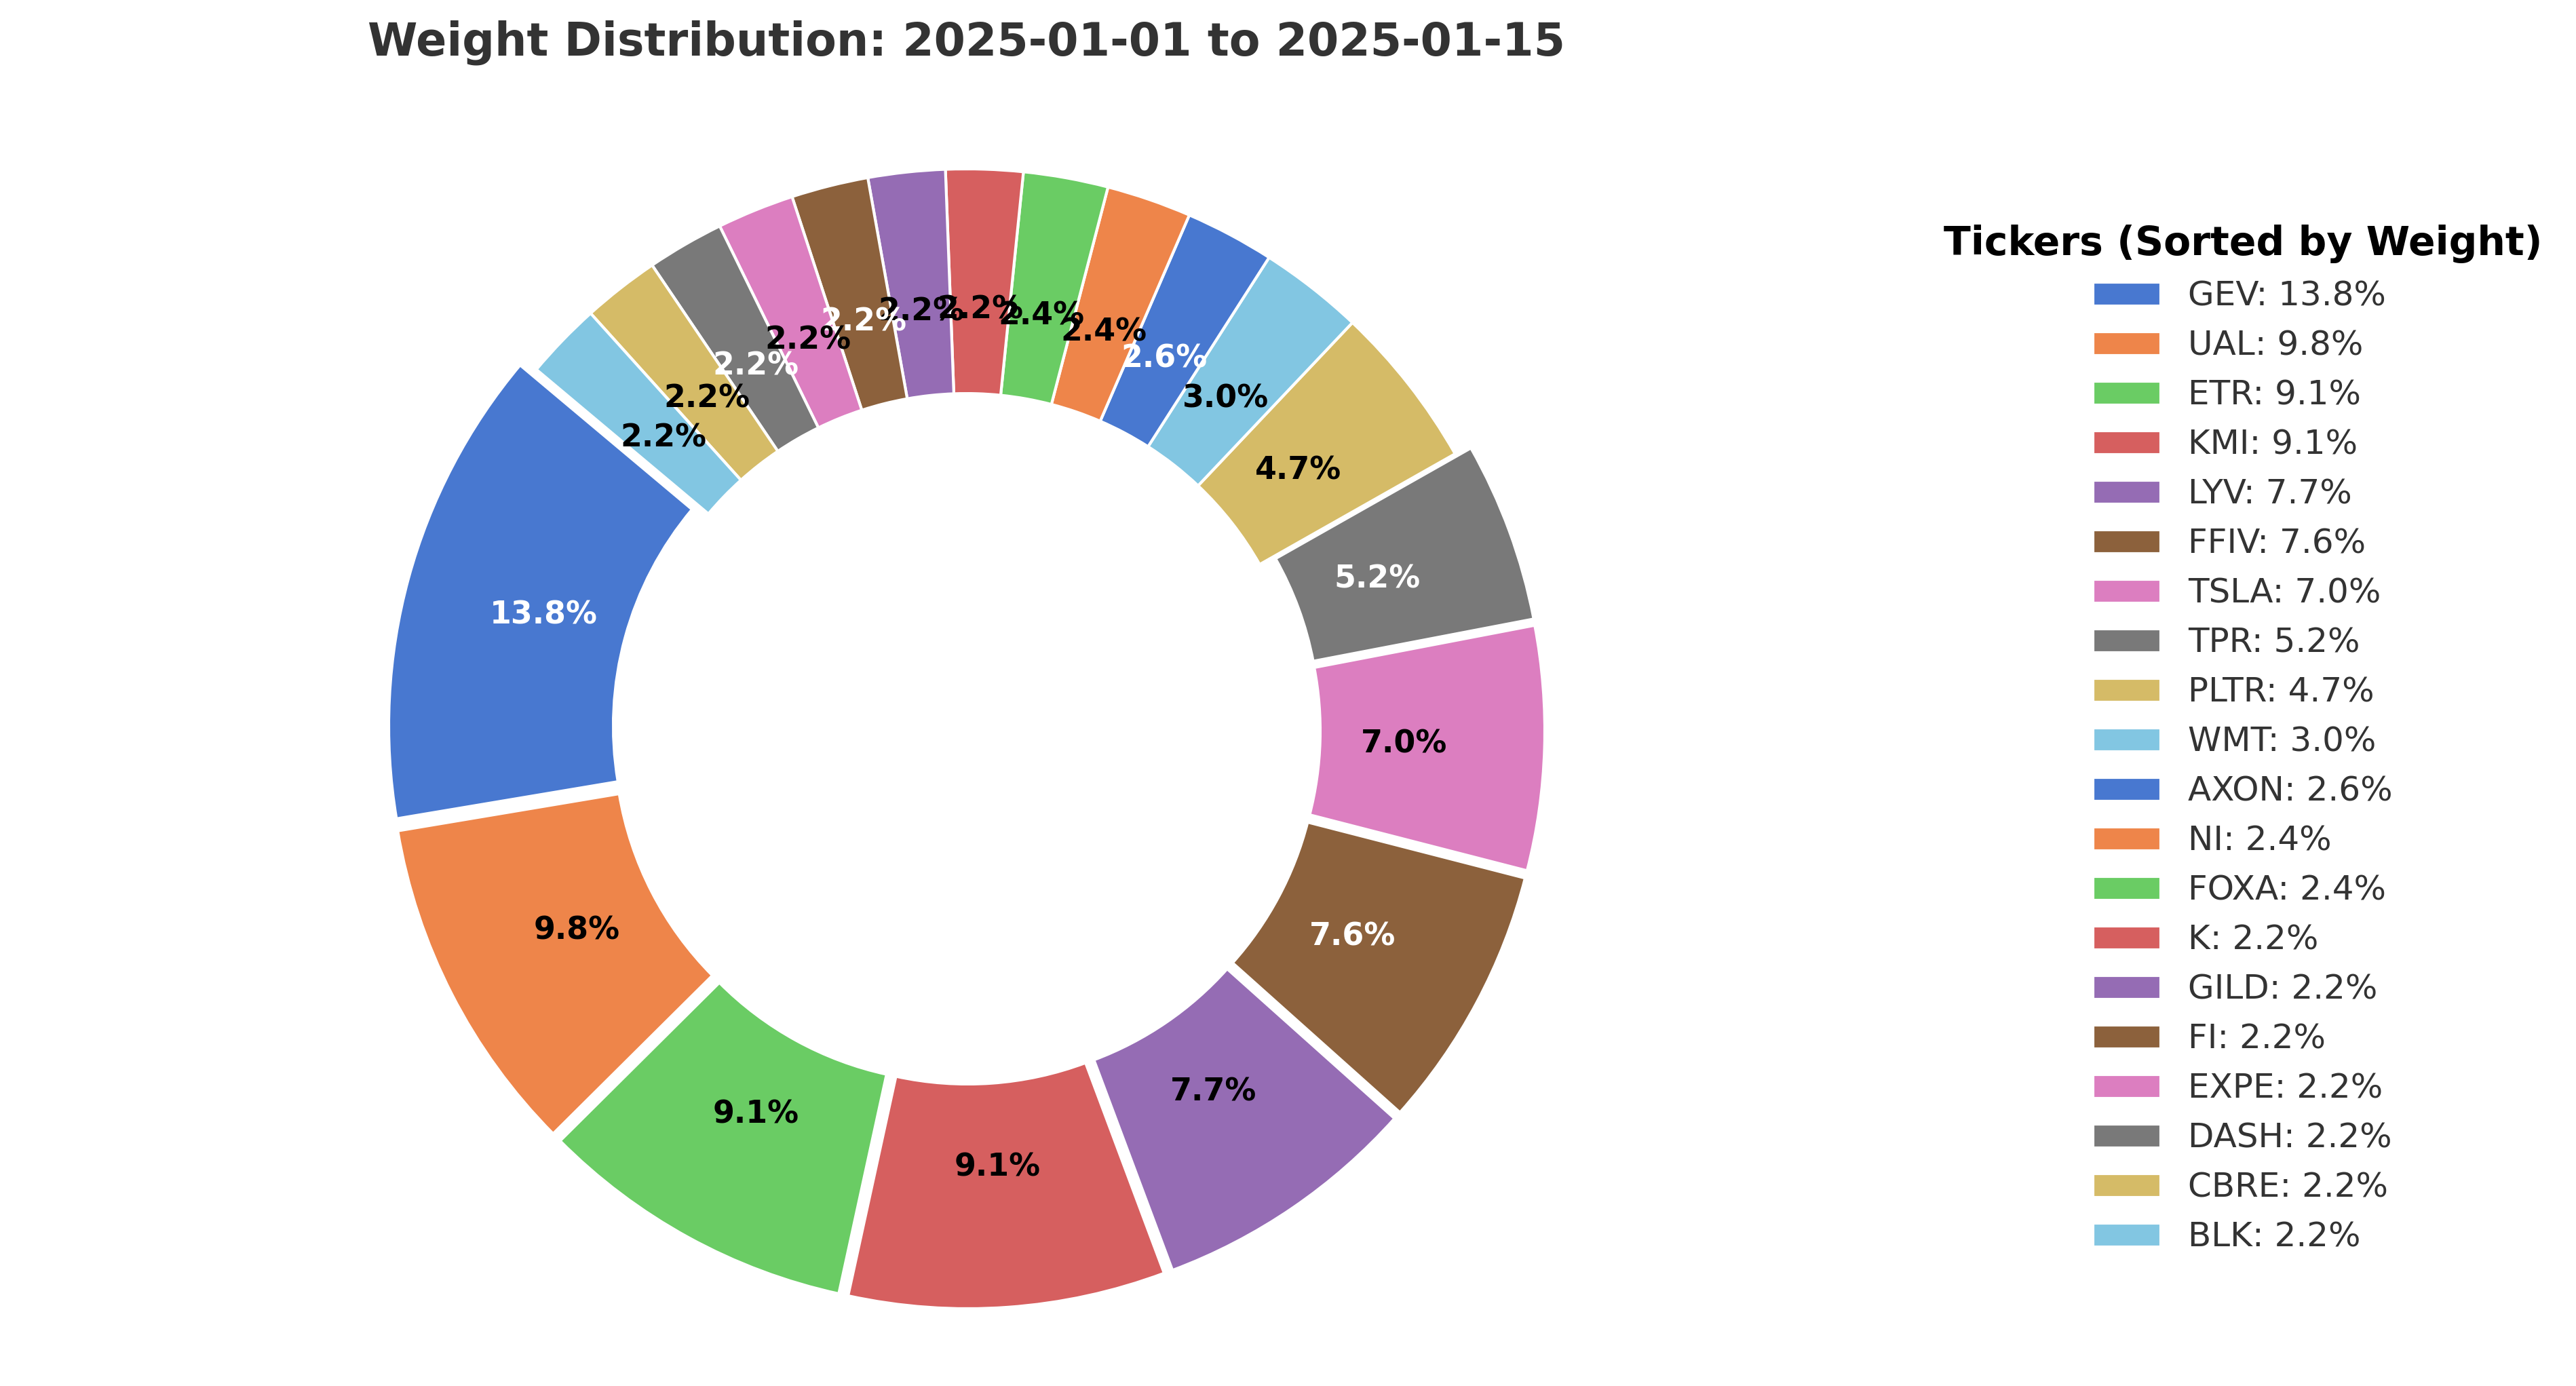

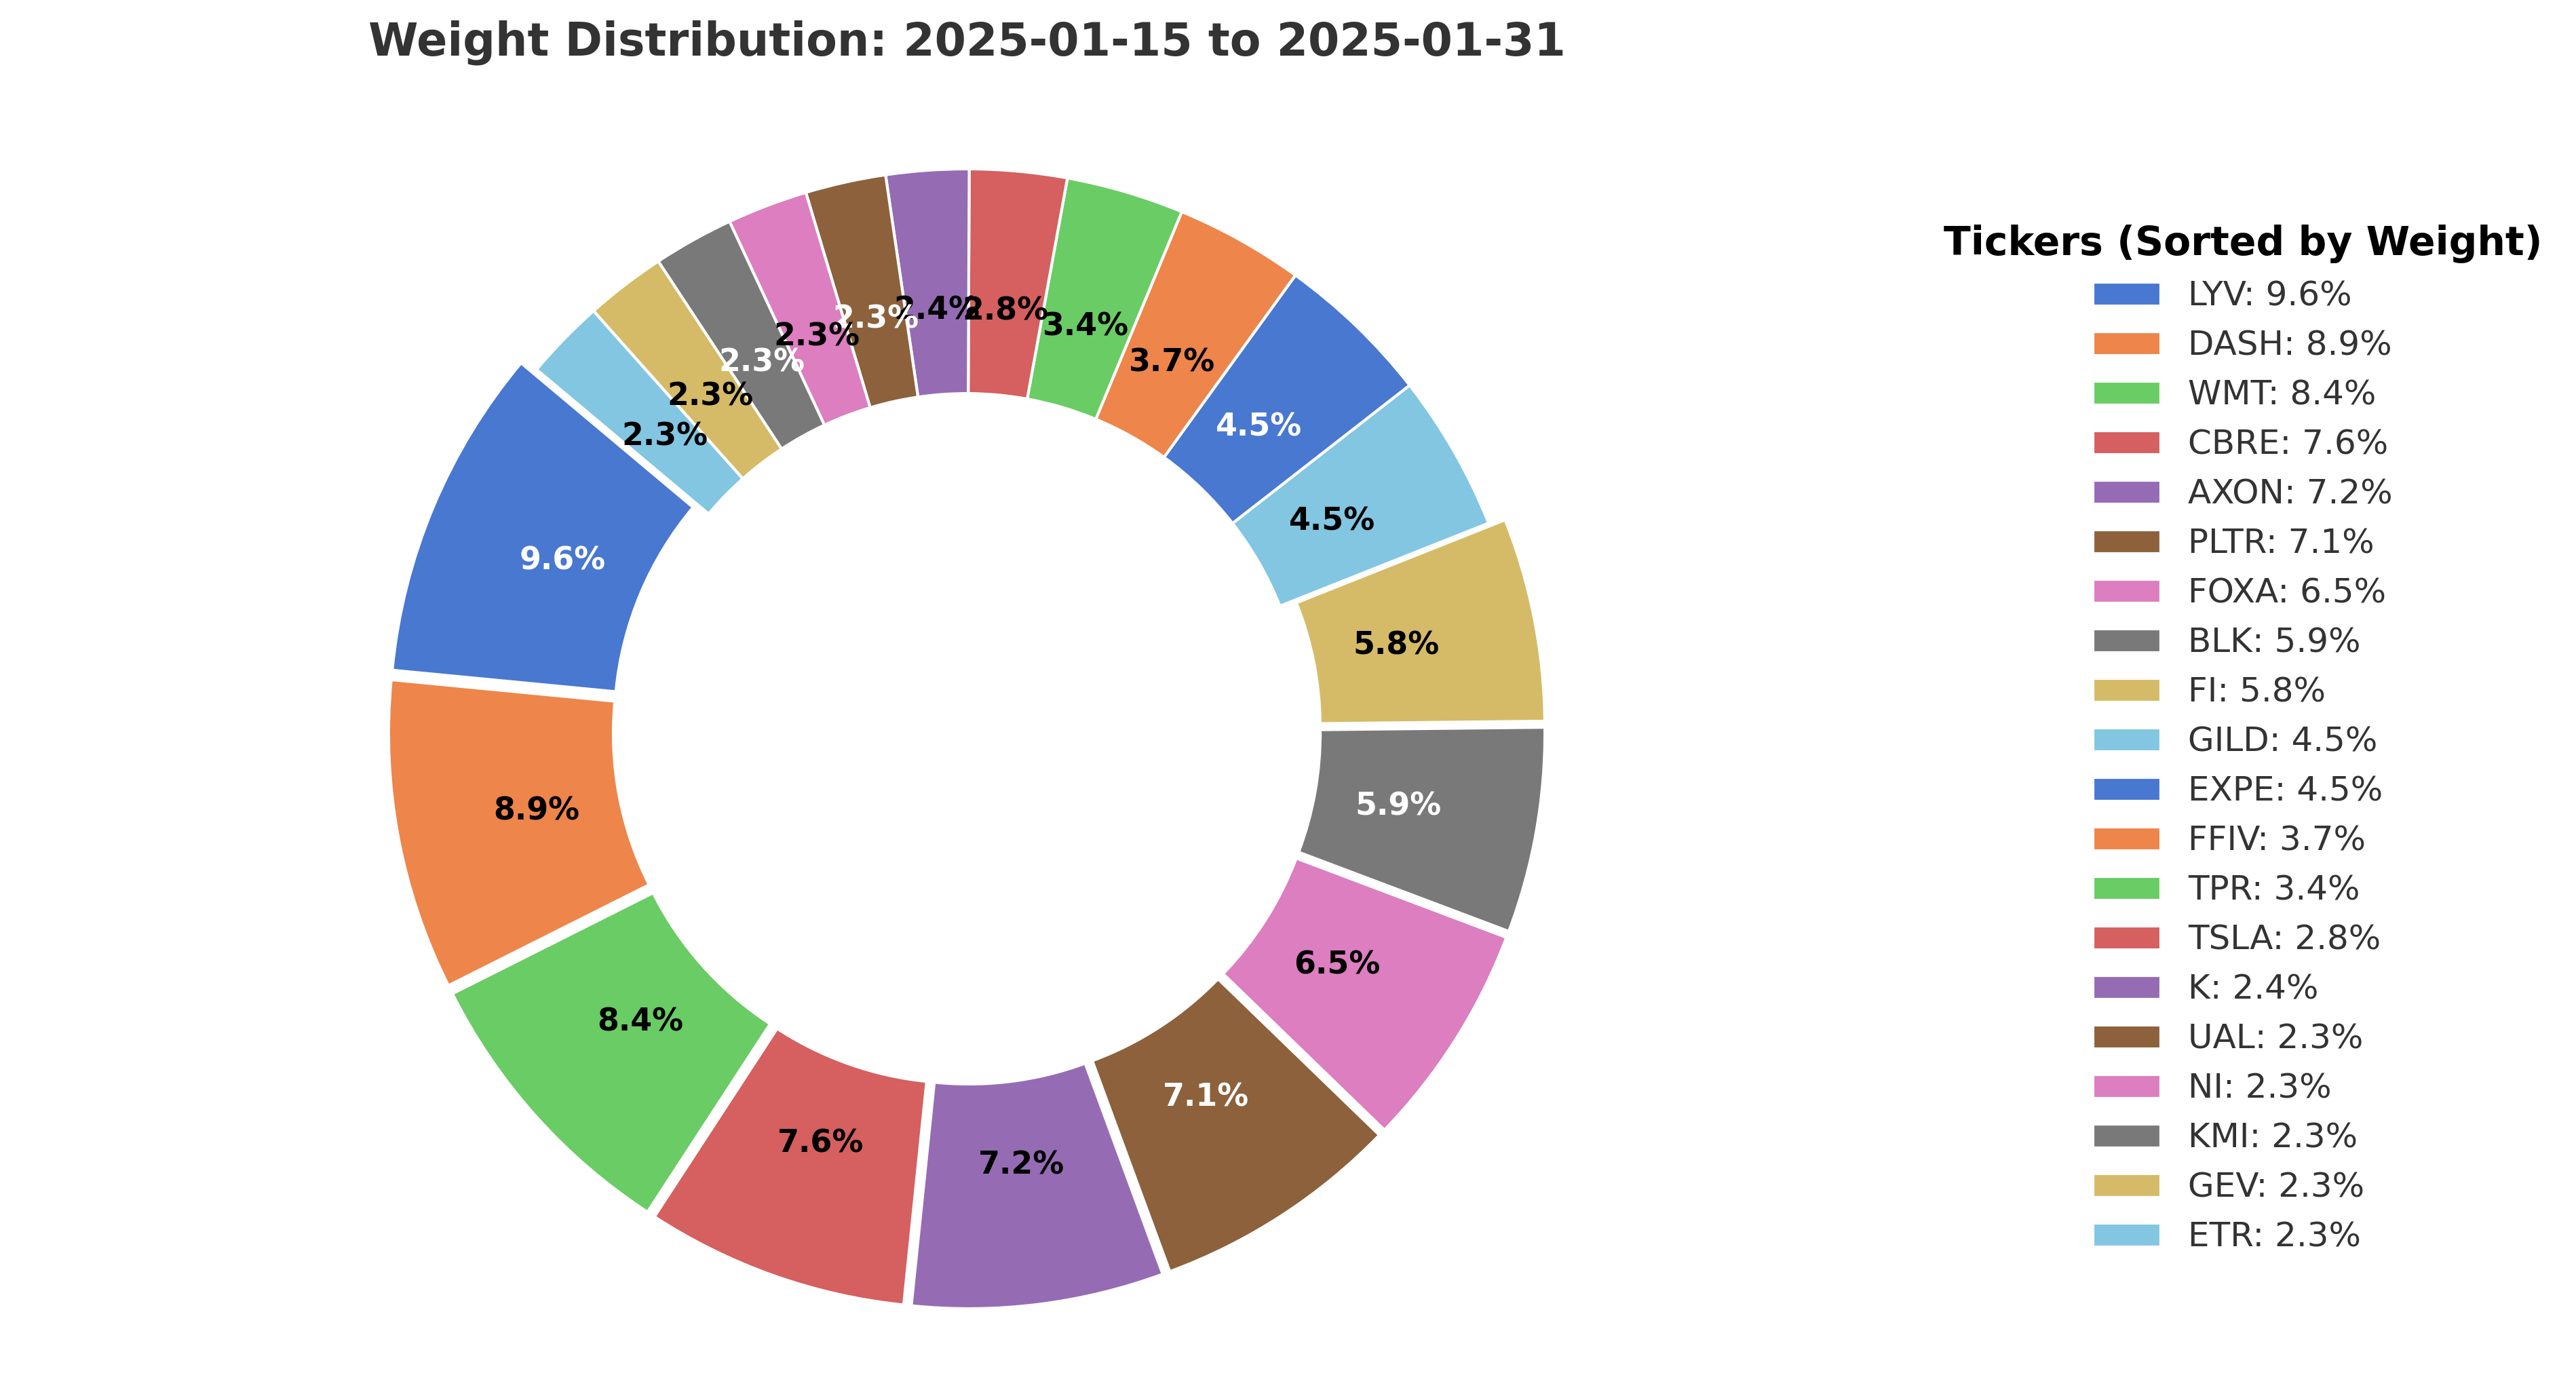

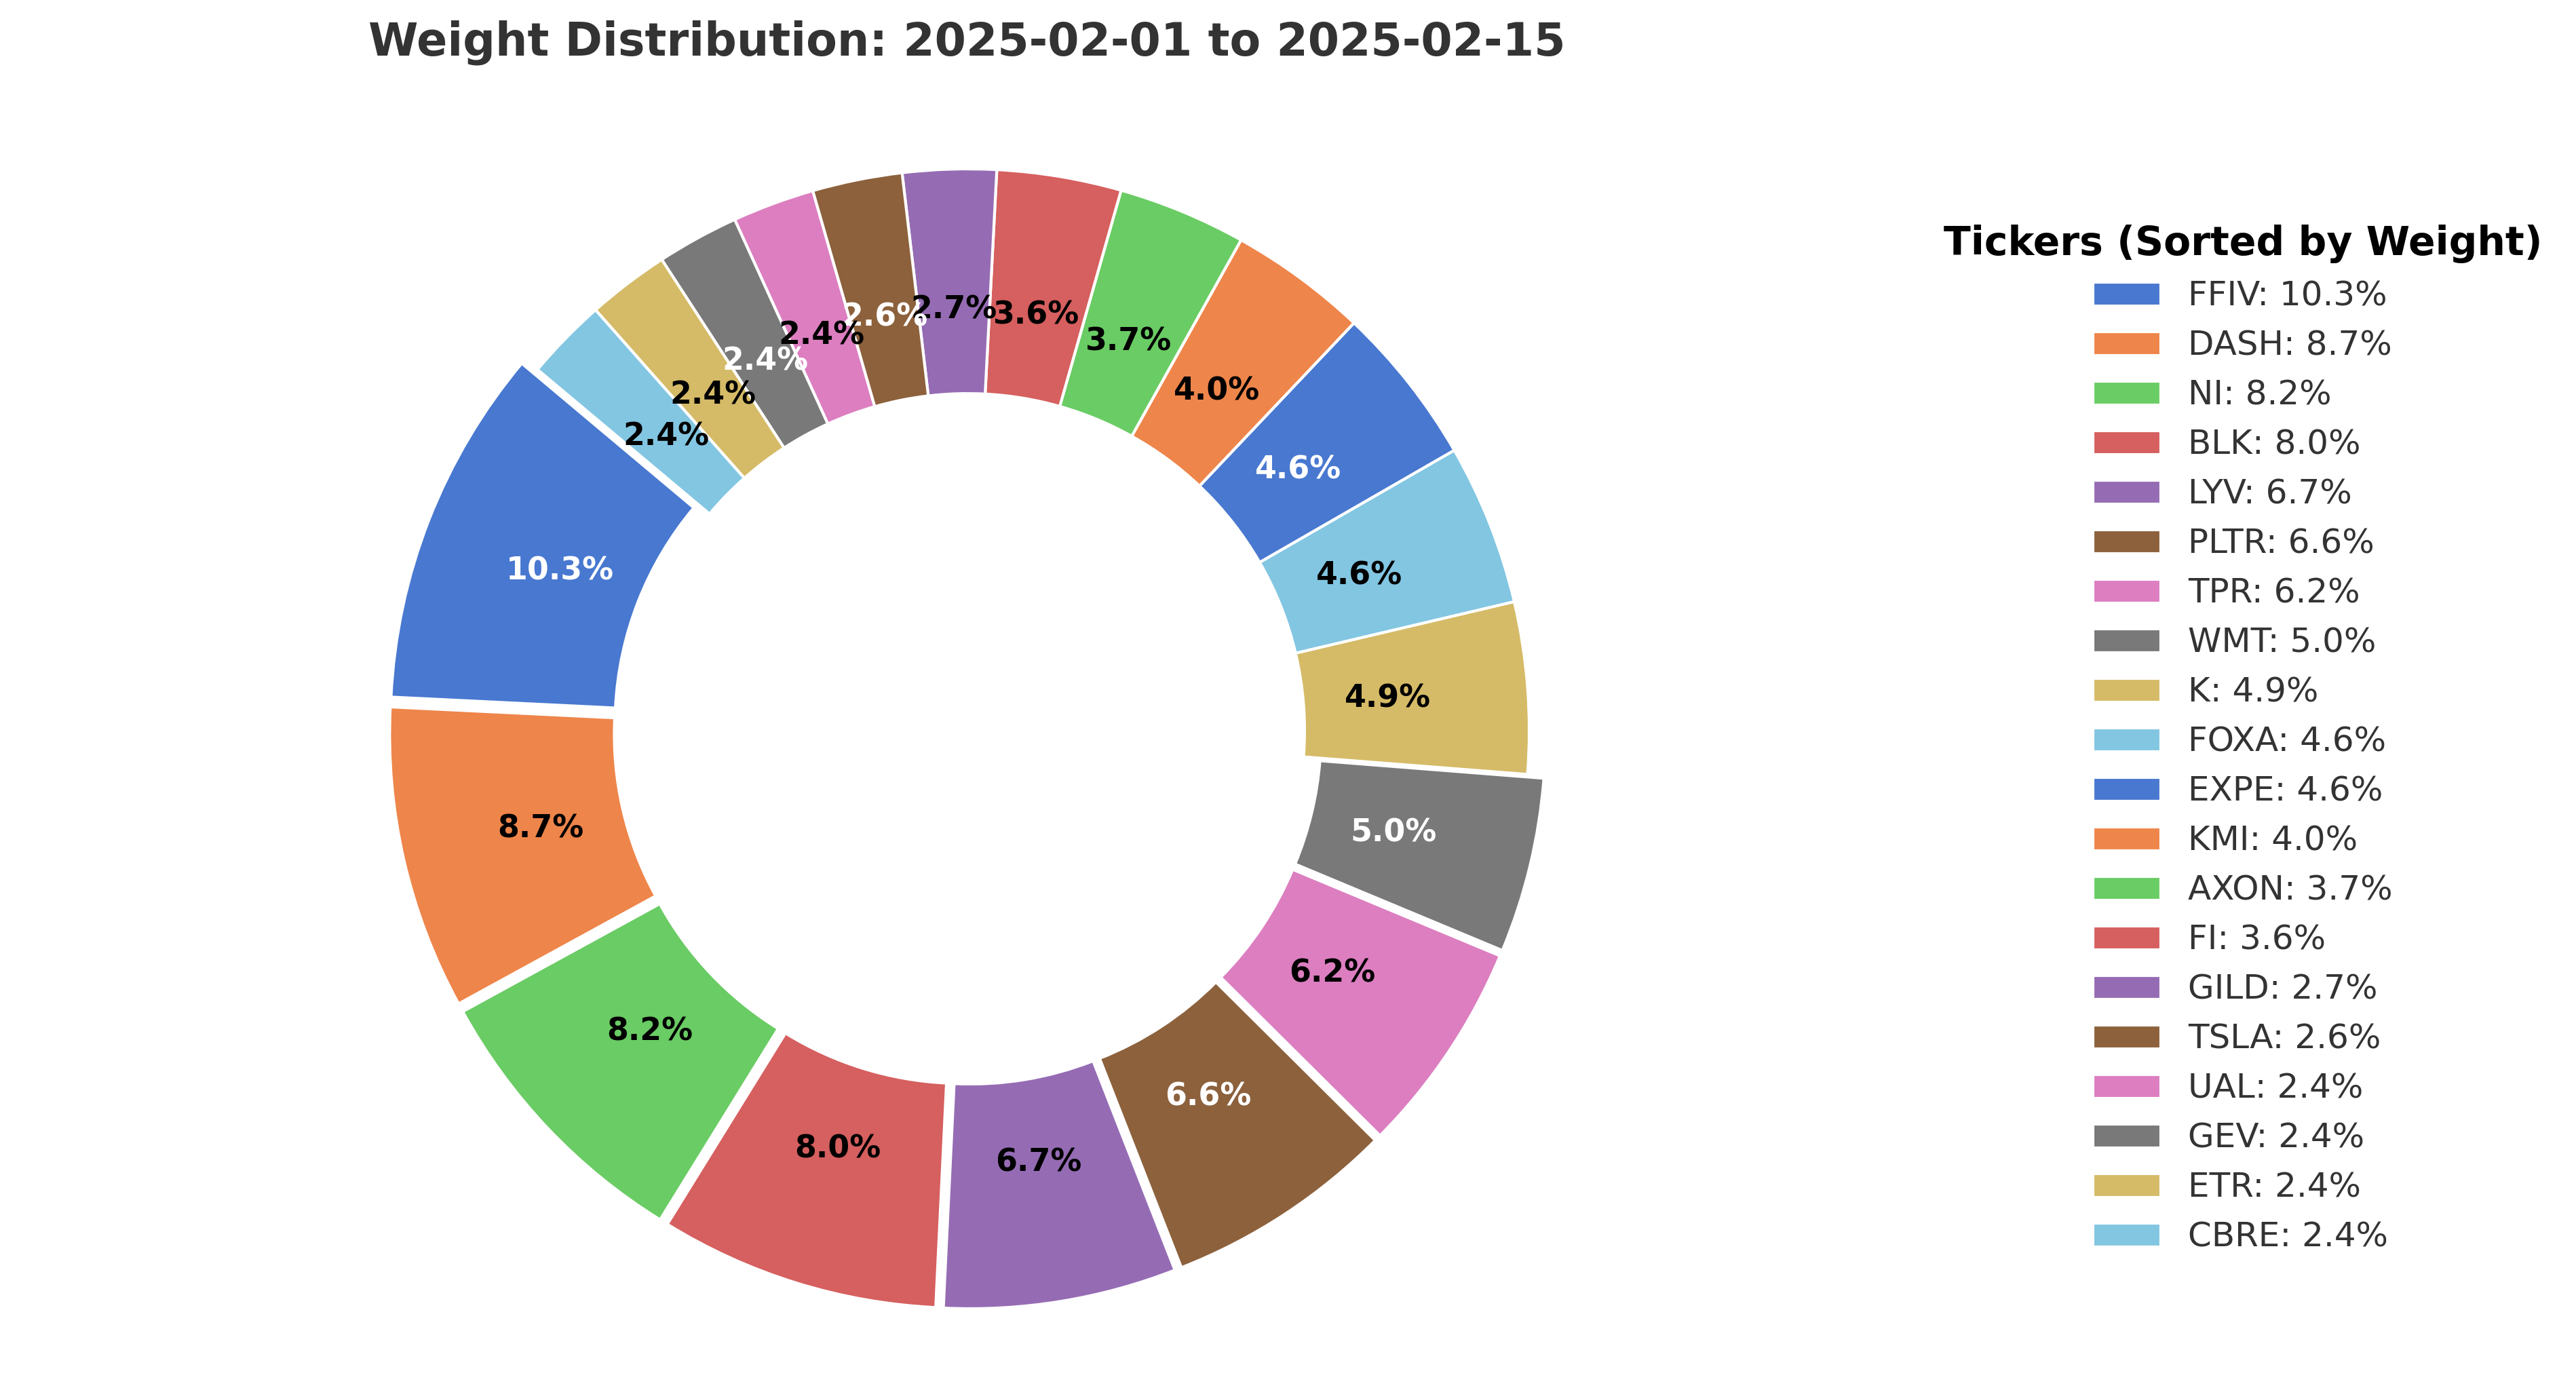

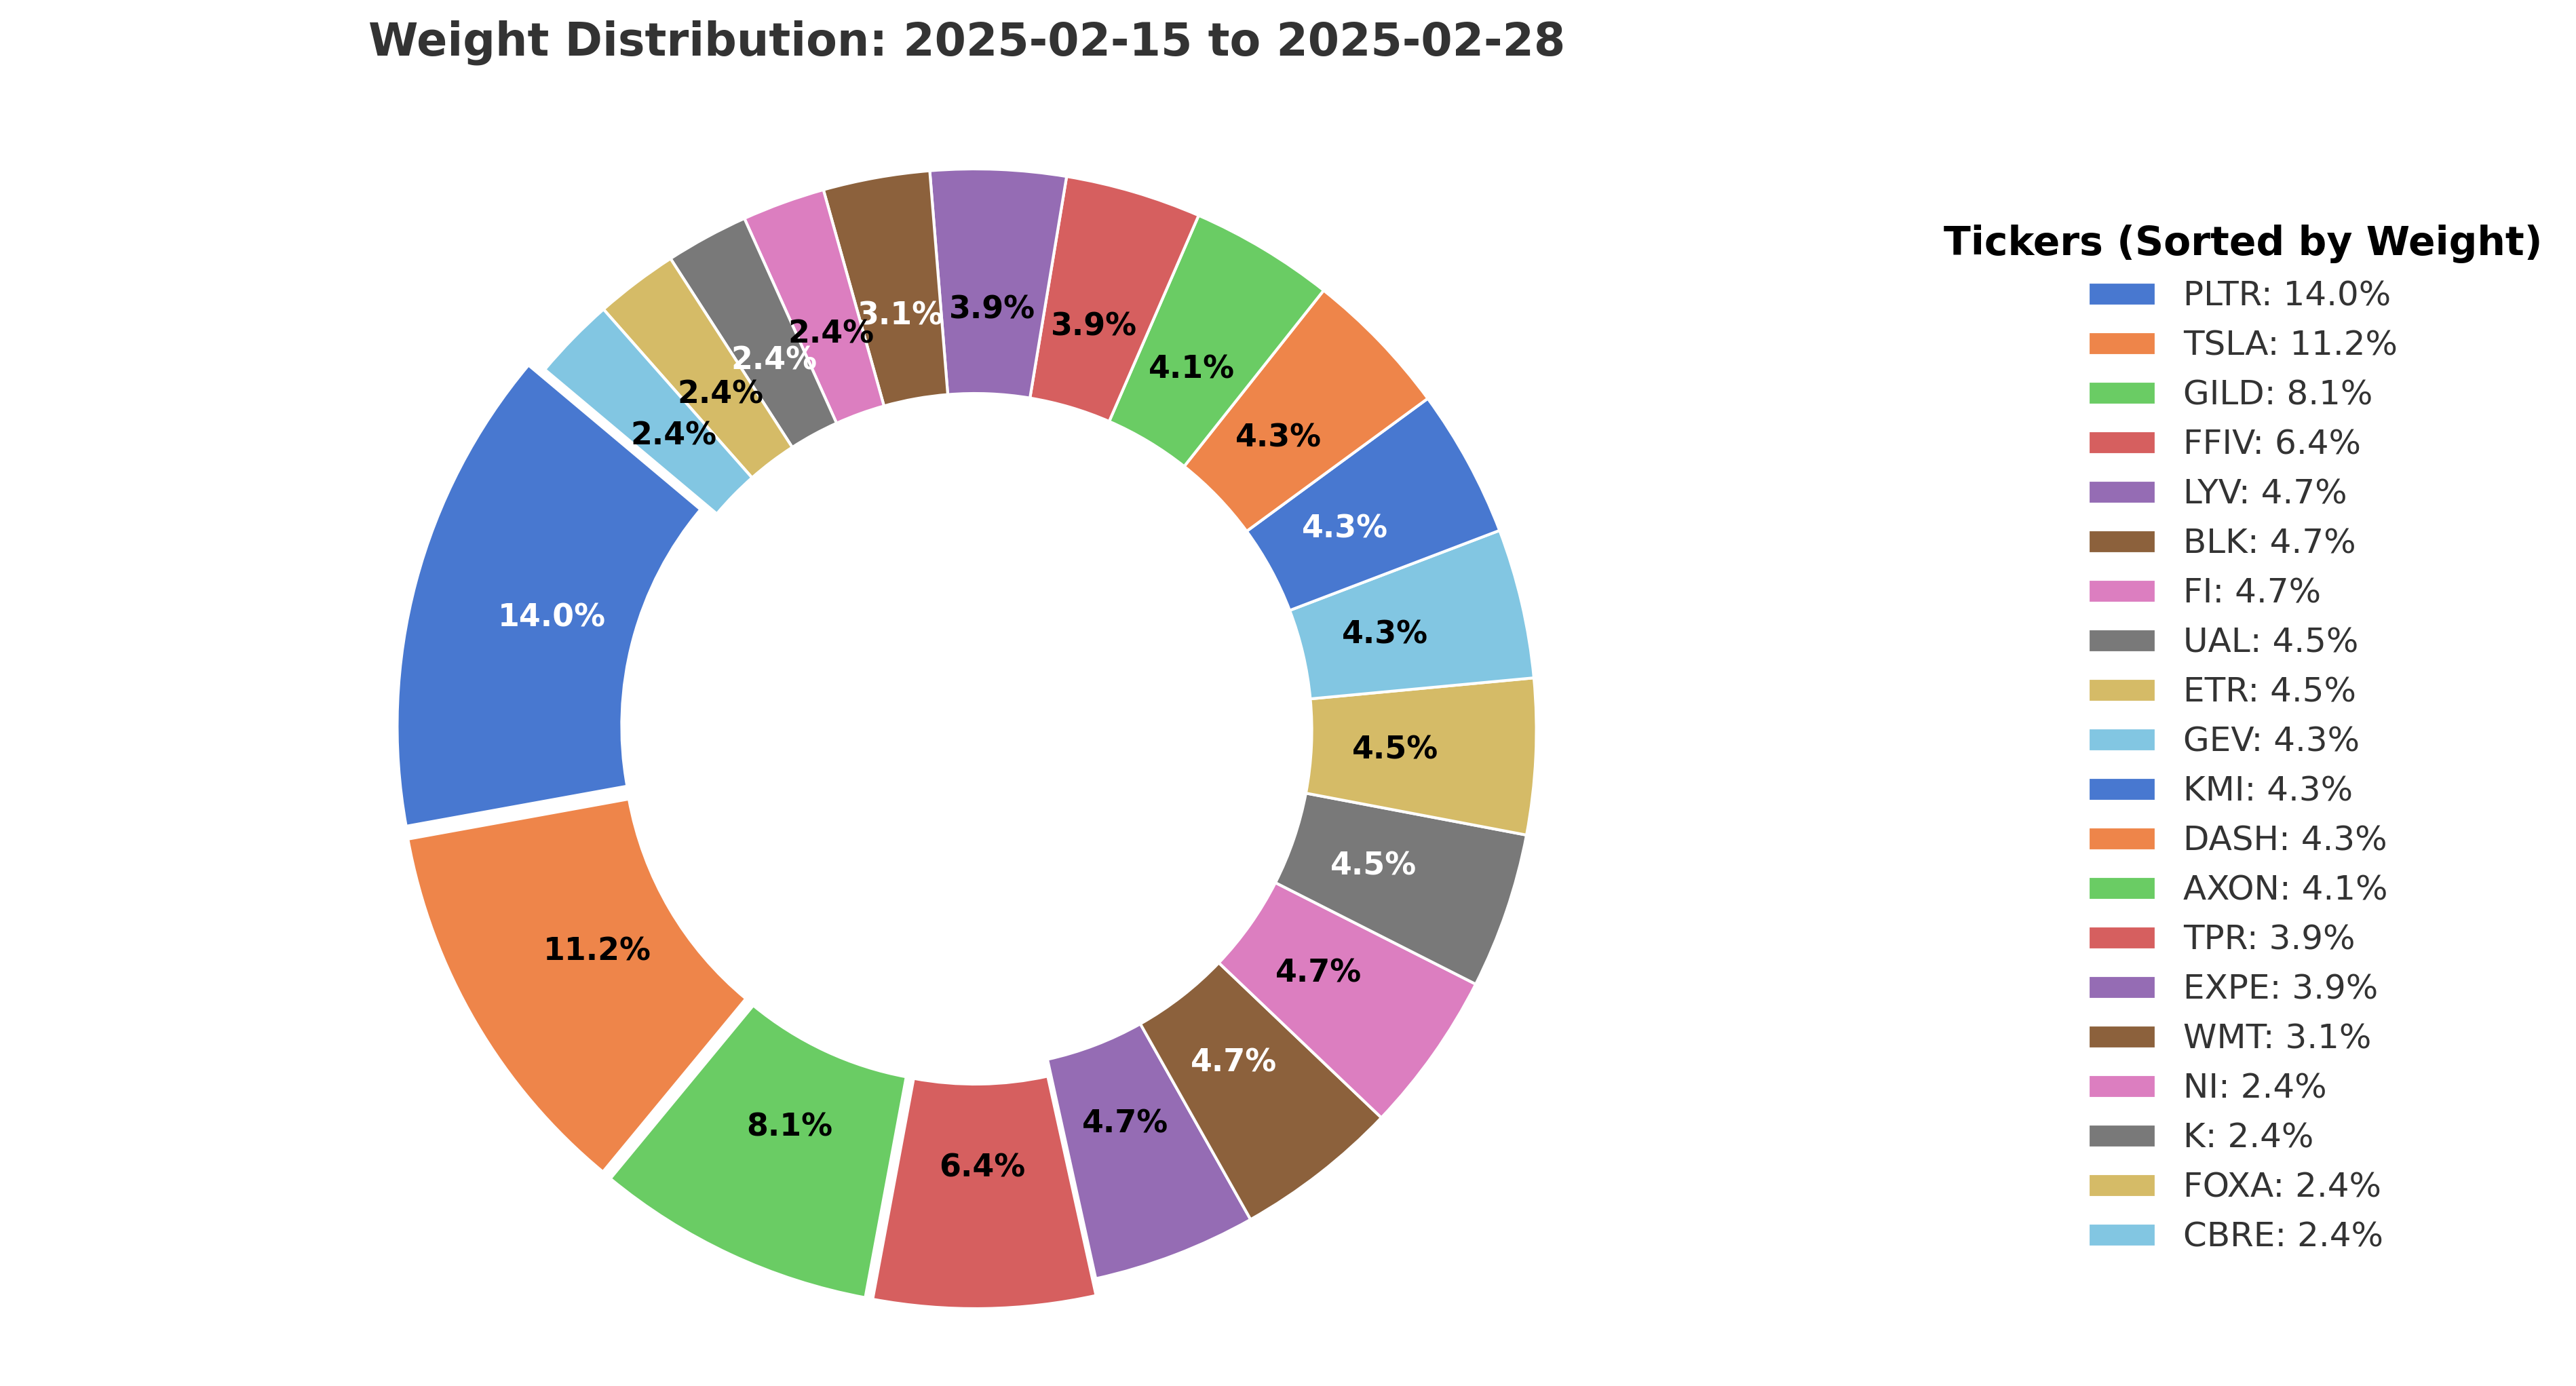

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from datetime import datetime
try:
    import seaborn as sns
    seaborn_available = True
except ImportError:
    seaborn_available = False

# Helper function to calculate Sharpe ratios
def calculate_metrics(price_data, start, end, tickers, risk_free_rate=0.0421):
    """
    Calculate Sharpe ratio for individual stocks.
    """
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)

    try:
        price_data = price_data.loc[start:end]
        if price_data.empty:
            raise ValueError(f"No data available for period {start} to {end}")
    except Exception as e:
        raise ValueError(f"Error accessing data for period {start} to {end}: {e}")

    returns = price_data.pct_change().dropna()
    if returns.empty:
        raise ValueError(f"No returns calculated for period {start} to {end}")

    trading_days = 252
    sharpe = {}

    for ticker in tickers:
        ticker_returns = returns[ticker]
        annualized_return = ticker_returns.mean() * trading_days
        volatility = ticker_returns.std() * np.sqrt(trading_days)
        excess_return = annualized_return - risk_free_rate
        sharpe_ratio = excess_return / volatility if volatility != 0 else 0
        sharpe[ticker] = sharpe_ratio

    return sharpe

# Helper function to adjust weights based on absolute Sharpe ratio
def adjust_weights(sharpe, tickers):
    """
    Adjust weights based on absolute Sharpe ratio, with higher absolute Sharpe ratios getting higher weights.
    """
    data = {
        "Ticker": tickers,
        "Abs_Sharpe": [abs(sharpe[t]) for t in tickers]
    }
    df = pd.DataFrame(data)

    def normalize(series):
        return (series - series.min()) / (series.max() - series.min() + 1e-10)

    df["Abs_Sharpe_Norm"] = normalize(df["Abs_Sharpe"])
    total_score = df["Abs_Sharpe_Norm"].sum()
    df["Weight"] = df["Abs_Sharpe_Norm"] / total_score if total_score != 0 else 1 / len(tickers)

    min_weight = 0.025
    df["Weight"] = df["Weight"].clip(lower=min_weight)
    df["Weight"] = df["Weight"] / df["Weight"].sum()

    return df[["Ticker", "Weight"]]

# Helper function to determine text color based on background color
def get_text_color(bg_color):
    """
    Determine whether to use black or white text based on the background color's luminance.
    """
    r, g, b = to_rgb(bg_color)
    luminance = 0.299 * r + 0.587 * g + 0.114 * b  # Standard luminance formula
    return 'black' if luminance > 0.5 else 'white'

# Modern donut chart plotting function with improved percentage visibility
def plot_weight_distribution_for_periods(all_period_dfs):
    """
    Create modern donut charts for each period showing the weight distribution across tickers.
    Percentages are displayed on the chart with better centering and in the legend.
    """
    # Use Matplotlib's default style with custom tweaks
    plt.style.use('default')

    # Use Seaborn's muted palette if available, else Matplotlib's Pastel1
    if seaborn_available:
        colors = sns.color_palette("muted", n_colors=20)
    else:
        colors = plt.cm.Pastel1(np.linspace(0, 1, 20))

    for period_name, df_period in all_period_dfs:
        tickers = df_period["Ticker"].tolist()
        weights = df_period["Weight"].tolist()

        # Sort tickers and weights by weight (descending) for legend
        sorted_pairs = sorted(zip(weights, tickers), reverse=True)
        weights, tickers = zip(*sorted_pairs)
        weights, tickers = list(weights), list(tickers)

        # Create explode array: 0.03 for weights > 5%, 0 otherwise
        explode = [0.03 if w > 0.05 else 0 for w in weights]

        # Create figure with light gradient background
        fig = plt.figure(figsize=(12, 8), dpi=300)
        ax = fig.add_subplot(111)

        # Add subtle gradient background
        fig.patch.set_facecolor('#ffffff')
        ax.set_facecolor('#f0f2f5')

        # Plot donut chart with percentage labels
        wedges, texts, autotexts = ax.pie(
            weights,
            explode=explode,
            colors=colors,
            autopct=lambda p: f'{p:.1f}%' if p >= 2 else '',  # Show percentage only for weights >= 2%
            startangle=140,
            pctdistance=0.75,  # Adjust position of percentage labels (closer to center than edge)
            textprops={'fontsize': 11, 'fontfamily': 'sans-serif', 'fontweight': 'bold'},
            wedgeprops={'width': 0.4, 'edgecolor': 'white'}  # Creates donut shape
        )

        # Customize percentage label colors based on slice color
        for autotext, wedge in zip(autotexts, wedges):
            autotext.set_color(get_text_color(wedge.get_facecolor()))
            autotext.set_fontweight('bold')

        # Add legend with sorted ticker names and weights
        legend_labels = [f"{ticker}: {weight*100:.1f}%" for ticker, weight in zip(tickers, weights)]
        ax.legend(
            wedges,
            legend_labels,
            title="Tickers (Sorted by Weight)",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1),
            fontsize=12,
            title_fontproperties={'family': 'sans-serif', 'weight': 'bold', 'size': 14},
            frameon=False,
            labelcolor='#333333'
        )

        # Set title
        ax.set_title(
            f"Weight Distribution: {period_name}",
            fontsize=16,
            fontfamily='sans-serif',
            fontweight='bold',
            pad=20,
            color='#333333'
        )

        # Ensure equal aspect ratio
        ax.axis('equal')

        # Save plot with transparent background
        safe_period_name = period_name.replace(':', '').replace(' ', '_')
        plt.savefig(
            f"weight_distribution_{safe_period_name}.png",
            bbox_inches='tight',
            dpi=300,
            transparent=True
        )

        # Display plot
        plt.show()

        # Close figure to free memory
        plt.close()

# Main function to generate weight DataFrames and plots
def generate_weight_dataframes():
    tickers = [
        "PLTR", "UAL", "GEV", "AXON", "FOXA", "FI", "KMI", "DASH",
        "CBRE", "NI", "WMT", "TSLA", "BLK", "ETR", "TPR", "FFIV",
        "EXPE", "K", "LYV", "GILD"
    ]

    initial_weights = {
        "AXON": 0.041044, "BLK": 0.045490, "CBRE": 0.038049, "DASH": 0.049959, "ETR": 0.058524,
        "EXPE": 0.026417, "FFIV": 0.053427, "FI": 0.035417, "FOXA": 0.026208, "GEV": 0.029167,
        "GILD": 0.043583, "K": 0.186816, "KMI": 0.039013, "LYV": 0.035354, "NI": 0.055138,
        "PLTR": 0.120853, "TPR": 0.028779, "TSLA": 0.029513, "UAL": 0.031930, "WMT": 0.025320
    }

    periods = [
        ("2025-01-01", "2025-01-15"),
        ("2025-01-15", "2025-01-31"),
        ("2025-02-01", "2025-02-15"),
        ("2025-02-15", "2025-02-28")
    ]

    print("Downloading price data...")
    price_data = yf.download(tickers, start="2025-01-01", end="2025-02-28")["Close"]
    price_data = price_data.dropna(axis=1)
    if price_data.empty:
        print("Error: No price data available for the specified period.")
        return

    weight_dfs = []
    all_period_dfs = []
    current_weights = initial_weights.copy()

    for i, (start, end) in enumerate(periods):
        date = end
        period_name = f"{start} to {end}"
        print(f"\nProcessing period {start} to {end} for weights on {date}...")

        try:
            sharpe = calculate_metrics(price_data, start, end, tickers)
            df_weights = adjust_weights(sharpe, tickers)
            df_weights["Date"] = date
            weight_dfs.append(df_weights)
            all_period_dfs.append((period_name, df_weights))
            current_weights = {row["Ticker"]: row["Weight"] for _, row in df_weights.iterrows()}
        except Exception as e:
            print(f"Error processing period {start} to {end}: {e}")
            continue

    if weight_dfs:
        final_df = pd.concat(weight_dfs, ignore_index=True)
        pivot_df = final_df.pivot(index="Ticker", columns="Date", values="Weight")
        pivot_df.columns = [f"Weight_{col}" for col in pivot_df.columns]
        pivot_df = pivot_df.reset_index()

        print("\nWeight DataFrame:")
        print(pivot_df)

        pivot_df.to_csv("weight_adjustments_2025.csv", index=False)
        print("\nResults saved to 'weight_adjustments_2025.csv'.")

        print("\nGenerating weight distribution plots...")
        plot_weight_distribution_for_periods(all_period_dfs)
    else:
        print("No weight DataFrames generated due to errors.")

if __name__ == "__main__":
    generate_weight_dataframes()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# Define tickers and initial weights
tickers = [
    "PLTR", "UAL", "GEV", "AXON", "FOXA", "FI", "KMI", "DASH",
    "CBRE", "NI", "WMT", "TSLA", "BLK", "ETR", "TPR", "FFIV",
    "EXPE", "K", "LYV", "GILD"
]

initial_weights = {
    "AXON": 0.028670, "BLK": 0.042773, "CBRE": 0.035642, "DASH": 0.056198, "ETR": 0.064501,
    "EXPE": 0.056405, "FFIV": 0.048627, "FI": 0.077619, "FOXA": 0.048180, "GEV": 0.042466,
    "GILD": 0.048627, "K": 0.057952, "KMI": 0.059714, "LYV": 0.053093, "NI": 0.060295,
    "PLTR": 0.040356, "TPR": 0.031066, "TSLA": 0.026806, "UAL": 0.051557, "WMT": 0.061694
}

# Construct all_period_dfs using the provided Weight DataFrame
weight_data = {
    "Ticker": ["AXON", "BLK", "CBRE", "DASH", "ETR", "EXPE", "FFIV", "FI", "FOXA", "GEV",
               "GILD", "K", "KMI", "LYV", "NI", "PLTR", "TPR", "TSLA", "UAL", "WMT"],
    "Weight_2025-01-15": [0.025641, 0.022153, 0.022153, 0.022153, 0.091370, 0.022153, 0.076045,
                          0.022153, 0.024380, 0.137532, 0.022153, 0.022153, 0.091065, 0.077007,
                          0.024396, 0.047400, 0.051857, 0.070165, 0.098046, 0.030025],
    "Weight_2025-01-31": [0.072435, 0.059058, 0.075629, 0.089347, 0.023156, 0.045093, 0.036986,
                          0.058474, 0.065059, 0.023156, 0.045194, 0.023808, 0.023156, 0.095847,
                          0.023156, 0.071480, 0.033850, 0.027995, 0.023156, 0.083963],
    "Weight_2025-02-15": [0.036881, 0.080484, 0.023599, 0.087410, 0.023599, 0.046089, 0.103369,
                          0.035784, 0.046309, 0.023599, 0.026908, 0.049307, 0.039810, 0.066977,
                          0.082198, 0.066186, 0.061645, 0.025857, 0.023599, 0.050388],
    "Weight_2025-02-28": [0.041434, 0.047147, 0.023850, 0.042670, 0.044756, 0.038939, 0.063769,
                          0.046509, 0.023850, 0.043039, 0.080608, 0.023850, 0.042708, 0.047153,
                          0.023850, 0.139665, 0.039122, 0.111607, 0.044805, 0.030670]
}

weight_df = pd.DataFrame(weight_data)

# Create all_period_dfs from the Weight DataFrame
all_period_dfs = []
periods = [
    ("2025-01-01 to 2025-01-15", "2025-01-15"),
    ("2025-01-15 to 2025-01-31", "2025-01-31"),
    ("2025-02-01 to 2025-02-15", "2025-02-15"),
    ("2025-02-15 to 2025-02-28", "2025-02-28")
]

for (period_name, date), weight_col in zip(periods, ["Weight_2025-01-15", "Weight_2025-01-31",
                                                     "Weight_2025-02-15", "Weight_2025-02-28"]):
    df_period = pd.DataFrame({
        "Ticker": weight_df["Ticker"],
        "Weight": weight_df[weight_col],
        "Date": date
    })
    all_period_dfs.append((period_name, df_period))

def compute_portfolio_metrics(all_period_dfs, tickers, initial_weights, start="2025-01-01", end="2025-02-28", risk_free_rate=0.0421, benchmark_ticker="^GSPC"):
    """
    Compute portfolio metrics over the entire period, accounting for changing weights across sub-periods.
    Daily returns in each sub-period are taken as absolute for Portfolio Return to reflect long/short positions.
    Volatility, Sharpe Ratio, and Alpha use raw (signed) returns for realistic risk measurement.
    Final metrics are returned as absolute values.
    """
    all_tickers = tickers + [benchmark_ticker]
    price_data = yf.download(all_tickers, start=start, end=end)["Close"]
    price_data = price_data.ffill()  # Handle missing data
    if price_data.empty:
        raise ValueError("No price data available for the specified period.")

    daily_returns = price_data.pct_change().dropna()

    # Compute portfolio daily returns with absolute values for total return calculation
    portfolio_daily_returns_abs = pd.Series(0.0, index=daily_returns.index)
    # Compute portfolio daily returns with raw (signed) returns for volatility, Sharpe Ratio, and Alpha
    portfolio_daily_returns_raw = pd.Series(0.0, index=daily_returns.index)

    periods = [
        ("2025-01-01", "2025-01-15"),
        ("2025-01-15", "2025-01-31"),
        ("2025-02-01", "2025-02-15"),
        ("2025-02-15", "2025-02-28")
    ]

    period_weights = [initial_weights]
    for _, df_period in all_period_dfs:
        weights = {row["Ticker"]: row["Weight"] for _, row in df_period.iterrows()}
        period_weights.append(weights)

    for i, (period_start, period_end) in enumerate(periods):
        period_start = pd.to_datetime(period_start)
        period_end = pd.to_datetime(period_end)

        weights = period_weights[i]
        weights_array = np.array([weights[ticker] for ticker in tickers])

        period_returns = daily_returns.loc[period_start:period_end, tickers]
        if period_returns.empty:
            continue

        # Raw portfolio returns for volatility, Sharpe Ratio, and Alpha
        period_portfolio_returns_raw = period_returns.dot(weights_array)
        portfolio_daily_returns_raw.loc[period_start:period_end] = period_portfolio_returns_raw

        # Absolute portfolio returns for total return calculation
        period_portfolio_returns_abs = abs(period_portfolio_returns_raw)
        portfolio_daily_returns_abs.loc[period_start:period_end] = period_portfolio_returns_abs

    portfolio_daily_returns_abs = portfolio_daily_returns_abs.dropna()
    portfolio_daily_returns_raw = portfolio_daily_returns_raw.dropna()

    if portfolio_daily_returns_abs.empty or portfolio_daily_returns_raw.empty:
        raise ValueError("No portfolio returns calculated for the specified period.")

    # Total return using absolute daily returns (for long/short effect)
    total_return = (portfolio_daily_returns_abs + 1).prod() - 1
    total_return_pct = abs(total_return * 100)  # Absolute value

    # Volatility and Sharpe Ratio using raw (signed) returns
    trading_days = 252
    daily_volatility = portfolio_daily_returns_raw.std()
    annualized_volatility = daily_volatility * np.sqrt(trading_days)
    annualized_volatility_pct = abs(annualized_volatility * 100)  # Absolute value

    daily_mean_return = portfolio_daily_returns_raw.mean()
    annualized_return = (1 + daily_mean_return) ** trading_days - 1
    sharpe_ratio = abs((annualized_return - risk_free_rate) / annualized_volatility if annualized_volatility != 0 else 0)  # Absolute value

    # Alpha using raw (signed) portfolio return compared to benchmark
    raw_total_return = (portfolio_daily_returns_raw + 1).prod() - 1
    benchmark_returns = daily_returns[benchmark_ticker]
    benchmark_total_return = (benchmark_returns + 1).prod() - 1
    alpha = raw_total_return - benchmark_total_return
    alpha_pct = abs(alpha * 100)  # Absolute value

    result = {
        "Portfolio Return (%)": [total_return_pct],
        "Annualized Volatility (%)": [annualized_volatility_pct],
        "Sharpe Ratio": [sharpe_ratio],
        "Alpha (%)": [alpha_pct]
    }
    df_portfolio_metrics = pd.DataFrame(result)

    return df_portfolio_metrics

# Call the function with defined variables
print("\nComputing portfolio metrics...")
try:
    portfolio_metrics = compute_portfolio_metrics(all_period_dfs, tickers, initial_weights)
    print("\nPortfolio Metrics (2025-01-01 to 2025-02-28):")
    print(portfolio_metrics)
except Exception as e:
    print(f"Error computing portfolio metrics: {e}")

[*******               14%                       ]  3 of 21 completed


Computing portfolio metrics...


[*********************100%***********************]  21 of 21 completed



Portfolio Metrics (2025-01-01 to 2025-02-28):
   Portfolio Return (%)  Annualized Volatility (%)  Sharpe Ratio  Alpha (%)
0             52.561526                  23.506206      2.405133   6.911709
